# Sheet 5:

In [3]:
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Exercise 2

In [4]:
def dataset_fixed_cov():
    '''Generate 2 Gaussians samples with the same covariance matrix'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -0.25], [0.83, 0.23]])
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([1, 1])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y

def dataset_varying_cov():
    '''Generate 2 Gaussians samples with the same covariance matrix'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -0.25], [0.83, 0.23]])
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), np.transpose(C)) + np.array([1, 1])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


Simulate data points with fixed and varying covariance and apply LDA and QDA on them

sigma 1 [[0.2329 0.043 ]
 [0.043  1.06  ]]
sigma 2 [[0.41   0.342 ]
 [0.342  0.8829]]


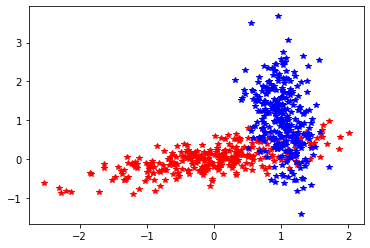

In [7]:
C1 = np.array([[-.4, 0.5], [0.27, 0.9]])
s1 = np.transpose(C1).dot(C1)
print('sigma 1',s1)
C2 = np.transpose(C1)
s2 = np.transpose(C2).dot(C2)
print('sigma 2',s2)

X,y = dataset_varying_cov()
plt.plot(X[y==0,0],X[y==0,1],'r*')
plt.plot(X[y==1,0],X[y==1,1],'b*')
plt.show()

In [10]:
# Function to plot data, lda/qda decision boundaries
from matplotlib import colors
# Colormap
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.subplot(2, 2, fig_index)
    if fig_index == 1:
        plt.title('Linear Discriminant Analysis')
        plt.ylabel('Data with\n fixed covariance')
    elif fig_index == 2:
        plt.title('Quadratic Discriminant Analysis')
    elif fig_index == 3:
        plt.ylabel('Data with\n varying covariances')

    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    # class 0: dots
    plt.scatter(X0_tp[:, 0], X0_tp[:, 1], marker='.', color='red')
    plt.scatter(X0_fp[:, 0], X0_fp[:, 1], marker='x',
                s=20, color='#990000')  # dark red

    # class 1: dots
    plt.scatter(X1_tp[:, 0], X1_tp[:, 1], marker='.', color='blue')
    plt.scatter(X1_fp[:, 0], X1_fp[:, 1], marker='x',
                s=20, color='#000099')  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=0)
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

    # means
    plt.plot(lda.means_[0][0], lda.means_[0][1],
             '*', color='yellow', markersize=15, markeredgecolor='grey')
    plt.plot(lda.means_[1][0], lda.means_[1][1],
             '*', color='yellow', markersize=15, markeredgecolor='grey')

    return splot

<ipython-input-10-c60e87a78b5b>:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
<ipython-input-10-c60e87a78b5b>:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',


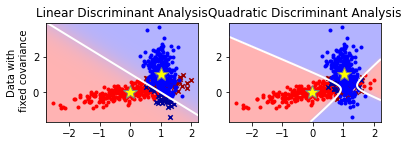

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(store_covariance=True)
lda_pred = lda.fit(X, y).predict(X)
splot = plot_data(lda, X, y, lda_pred, fig_index= 1)

qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda_pred = qda.fit(X, y).predict(X)
splot = plot_data(qda, X, y, qda_pred, fig_index= 2)

## Exercise 3

In [13]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
features, target = load_wine(return_X_y=True)
# Make a train/test split using 30% test size
RANDOM_STATE=40
Xtrain, Xtest, ytrain, ytest = train_test_split(features, target,
                                                    test_size=0.30,
                                                    random_state=RANDOM_STATE)

In [14]:
Xtrain_mean = np.mean(Xtrain)
Xtrain_std = np.std(Xtrain)
# Scale training data to have zero mean and unit variance (standard derivation)
Xtrain = (Xtrain-Xtrain_mean)/Xtrain_std

# Scale testing data using training mean and trainig standard derivation
Xtest = (Xtest-Xtrain_mean)/Xtrain_std

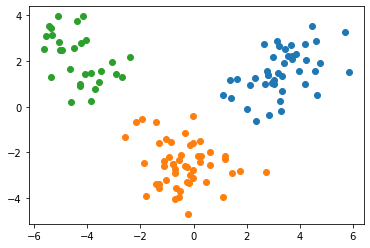

In [16]:
lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(Xtrain, ytrain)
transformed_X = lda.transform(Xtrain)

plt.scatter(transformed_X[ytrain == 0, 0], transformed_X[ytrain == 0, 1])
plt.scatter(transformed_X[ytrain == 1, 0], transformed_X[ytrain == 1, 1])
plt.scatter(transformed_X[ytrain == 2, 0], transformed_X[ytrain == 2, 1])

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit(Xtrain).transform(Xtrain)

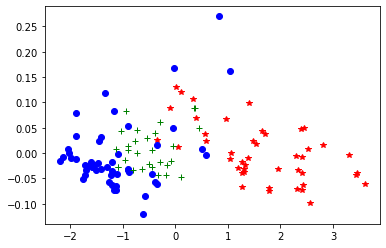

In [18]:
plt.plot(X_pca[ytrain==0,0],X_pca[ytrain==0,1],'r*') # make a scatterplot
plt.plot(X_pca[ytrain==1,0],X_pca[ytrain==1,1],'bo') # make a scatterplot
plt.plot(X_pca[ytrain==2,0],X_pca[ytrain==2,1],'g+') # make a scatterplot

The purpose of linear discriminant analysis (LDA) in this example is to find the linear combinations of the original variables (the 13 chemical concentrations here) that gives the best possible separation between the groups (wine cultivars here) in our data set. Linear discriminant analysis is also known as “canonical discriminant analysis”, or simply “discriminant analysis”.

If we want to separate the wines by cultivar, the wines come from three different cultivars, so the number of groups $G=3$, and the number of variables is 13 (13 chemicals’ concentrations; $p=13$). The maximum number of useful discriminant functions that can separate the wines by cultivar is the minimum of $G−1$
and $p$, and so in this case it is the minimum of 2 and 13, which is 2. Thus, we can find at most 2 useful discriminant functions to separate the wines by cultivar, using the 13 chemical concentration variables.
For futher explanation, please refer to http://multivariatestatsjl.readthedocs.io/en/latest/mclda.html